# Ejercicio de programación Regresión Lineal

In [ ]:
#nombre :Alexander Sacaca Colque
#repositorio : https://github.com/Rednaxcolque023/InteligenciaArtificialASC/tree/main/Laboratorios

In [36]:

# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida. 

In [37]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('Covid_Data.txt'), delimiter=',')
X, y = data[:, :19], data[:, 19]

m = y.size  # m = numero de ejemplos de entrenamiento

### 1.1 Trazar los datos

In [38]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


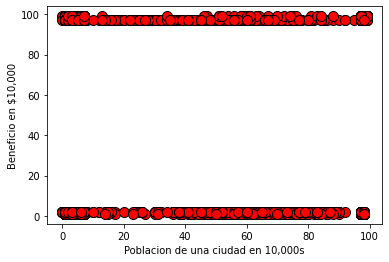

In [39]:
plotData(X, y)

In [40]:
?pyplot.plot

In [41]:
def normalizar(X):
  X_nomr= X.copy()
  mu=np.zeros(X.shape[1])
  sigma=np.zeros(X.shape[1])
  
  mu= np.mean(X, axis=0)
  sigma=np.std(X, axis=0)
  X_nomr=(X-mu)/sigma
  return X_nomr, mu, sigma

In [42]:
X_norm, mu, sigma=normalizar(X)
print(X)
print('media: ', mu)
print('desviacion: ', sigma)
print(X_norm)

[[2. 1. 1. ... 2. 2. 3.]
 [2. 1. 2. ... 1. 2. 5.]
 [2. 1. 2. ... 2. 2. 3.]
 ...
 [1. 3. 2. ... 2. 2. 3.]
 [1. 3. 1. ... 2. 2. 6.]
 [2. 3. 2. ... 2. 2. 6.]]
media:  [ 1.522  2.529  1.567  1.701 33.543  3.333 53.418 55.96   1.988  2.156
  2.177  2.347  1.97   2.822  2.326  2.026  2.315  2.312  4.632]
desviacion:  [ 0.49951577  0.74240084  0.49549067  0.45781983 45.08975661 13.67516402
 21.40292681 47.06070973  5.28657318  4.29460871  4.29134839  6.0647004
  5.28820385  9.07250329  6.06759623  4.31246148  6.06908354  6.06948565
  1.86884349]
[[ 0.95692675 -2.05953432 -1.14432024 ... -0.0519024  -0.05140469
  -0.87326735]
 [ 0.95692675 -2.05953432  0.87388124 ... -0.21667192 -0.05140469
   0.19691323]
 [ 0.95692675 -2.05953432  0.87388124 ... -0.0519024  -0.05140469
  -0.87326735]
 ...
 [-1.04501206  0.63442817  0.87388124 ... -0.0519024  -0.05140469
  -0.87326735]
 [-1.04501206  0.63442817 -1.14432024 ... -0.0519024  -0.05140469
   0.73200351]
 [ 0.95692675  0.63442817  0.87388124 ... -0.

In [45]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X.shape

(1000, 20)

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [46]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [49]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [50]:
# inicializa los parametros de ajuste
theta = np.zeros(20)

# configuraciones para el descenso por el gradiente
iterations = 150000
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 33.6590, 0.1412
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

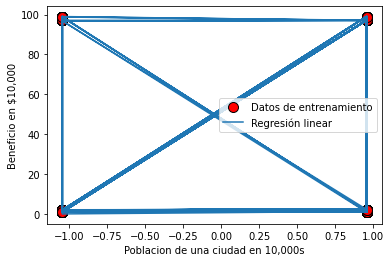

In [51]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [53]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 2,1,1,1,97,2,23,2,2,2,2,2,2,2,2,2,2,2,3], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

#predict2 = np.dot([1, 9], theta)
#print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 43912822.17

